In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/Mlbb_Heroes.csv')
df.head()

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
0,Aamon,Duke of Shards,"It is better to be feared than loved, if you c...",2021-10-25,Assassin,NaN,Jungler,2614,8.0,455,21.0,115,0,19,15,250,43,42
1,Akai,Panda Warrior,Now Akai enters the scene!,2016,Tank,Support,Roamer,2769,8.4,422,12.0,115,0,24,15,260,540,524
2,Aldous,Soul Contractor,Primary Role,2018,Fighter,NaN,EXP Lane,2718,9.8,405,18.0,129,0,21,15,260,95,92
3,Alice,Queen of Blood,Watch your back!,2016,Mage,Tank,EXP Lane,2573,7.2,493,18.0,114,0,21,15,240,364,352
4,Alpha,Blade of Enmity,Test! Alpha is online.,2017,Fighter,NaN,EXP Lane,2646,7.8,453,31.0,121,0,25,15,260,24,33


In [3]:
df['Hero_Defense'] = df['Mag_Defence'] + df['Phy_Defence']
df['Win_Rate'] = df['Esport_Wins'] / (df['Esport_Wins'] + df['Esport_Loss'])
df['Hard_Engage'] = (df['Phy_Damage'] + df['Mov_Speed'])
df['Team_Fight'] = (df['Phy_Damage'] + df['Hp'] + df['Hero_Defense'])

In [87]:
hero_df = df[['Name', 'Lane', 'Hard_Engage', 'Team_Fight']]
hero_df.head()

,Name,Lane,Hard_Engage,Team_Fight
0,Aamon,Jungler,365,2763
1,Akai,Roamer,375,2923
2,Aldous,EXP Lane,389,2883
3,Alice,EXP Lane,354,2723
4,Alpha,EXP Lane,381,2807


In [88]:
gold = df[df['Lane'] == 'Gold Lane']
mid = df[df['Lane'] == 'Mid']
exp = df[df['Lane'] == 'EXP Lane']
roamer = df[df['Lane'] == 'Roamer']
jungler = df[df['Lane'] == 'Jungler']

Hard Engage
Attack Defense + Movement Speed

In [97]:
# Create a list of dataframes for each role
roles = [gold, mid, exp, roamer, jungler]

# Calculate the sum of the maximum Hard_Engage for each role
max_hard_engage_sums = [role.groupby('Lane')['Hard_Engage'].max().sum() for role in roles]

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Role': ['Gold Lane', 'Mid', 'EXP Lane', 'Roamer', 'Jungler'],
    'Max_Hard_Engage_Sum': max_hard_engage_sums
})

total_he = result_df['Max_Hard_Engage_Sum'].sum()
print(total_he)

1947


In [ ]:
# import random

# hero_data = hero_df.to_dict(orient='records')

# # Inisialisasi populasi
# pop_size = 20
# population = []

# for _ in range(pop_size):
#     # Ambil 5 hero secara acak dari hero_data
#     team = random.sample(hero_data[:-1], 5)  # Hanya ambil 5 hero, mengabaikan 'Badang'
#     population.append(team)
#     # Menampilkan populasi awal
# for i, team in enumerate(population, 1):
#     print(f"Team {i}:")
#     for hero in team:
#         print(f"  Nama: {hero['Name']}, Lane: {hero['Lane']}, Hard Engage: {hero['Hard_Engage']}, Team Fight: {hero['Team_Fight']}")


In [ ]:
# target_positions = ['Gold Lane', 'Mid', 'EXP Lane', 'Roamer', 'Jungler']

# for individual in population:
#     lanes = [hero['Lane'] for hero in individual]
#     x = 0

#     for lane, target_lane in zip(lanes, target_positions):
#         if lane != target_lane:
#             x += 1

#     print(f"Individual's matching lanes: {x}")

In [166]:
target_positions = ['Gold Lane', 'Mid', 'EXP Lane', 'Roamer', 'Jungler']

def calculate_fitness(individual):
    # Inisialisasi fitness value
    fitness_value = 0

    # Loop melalui setiap hero dalam individu
    for i, hero in enumerate(individual, 0):
        # print(hero['Lane'] == target_positions[i],'|', hero['Lane'],'X', target_positions[i])
        if hero['Lane'] in target_positions[i]:
            # Jika sesuai, tambahkan nilai AD dan MS ke fitness value
            fitness_value += hero['Hard_Engage'] + hero['Team_Fight']

    return fitness_value

fitness_values = [calculate_fitness(individual) for individual in population]

# Menampilkan hasil fitness value untuk setiap individu
for i, fitness_value in enumerate(fitness_values, 1):
    print(f"Individu {i} Fitness Value:", fitness_value)


Individu 1 Fitness Value: 3294
Individu 2 Fitness Value: 5455
Individu 3 Fitness Value: 0
Individu 4 Fitness Value: 6187
Individu 5 Fitness Value: 2988
Individu 6 Fitness Value: 0
Individu 7 Fitness Value: 2885
Individu 8 Fitness Value: 1452
Individu 9 Fitness Value: 9201
Individu 10 Fitness Value: 3057


### Main MUFTI

In [77]:
import random
import string
import pandas as pd


# Target kata yang akan dicari
target_word = "amin"

# Mengikutsertakan semua simbol dalam pencarian
symbols = string.ascii_letters + string.digits + string.punctuation + " "
temp_result = []
temp_population = []

# Fungsi untuk menghitung fitness
def fitness(word):
    result = sum(c1 == c2 for c1, c2 in zip(word, target_word))
    if result == 0:
        return 1
    else:
        return result

# Fungsi untuk menghasilkan individu acak
def generate_random_word(length):
    return ''.join(random.choice(symbols) for _ in range(length))

# Operasi Crossover (Single-Point Crossover)
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

# Algoritma genetika
def genetic_algorithm(target, mutation_rate):

    generation = 1

    # Populasi awal
    population = []
    ([population.append(generate_random_word(len(target))) for _ in range(5)])

    while True:
        population = sorted(population, key=fitness, reverse=True)
        best_word = population[0]

        data_dict = {
            "generation": generation,
            "data": best_word,
            'f_obj': fitness(best_word),
            'fitness': round(fitness(best_word)/len(target_word), 5)
        }

        temp_result.append(data_dict)

        if best_word == target:
            break

        new_population = [best_word]

        for _ in range(1, len(population)):
            parent1, parent2 = random.choices(population[:5], k=2)
            child = crossover(parent1, parent2)

            for i in range(len(target)):
                if random.random() < mutation_rate:
                    child = child[:i] + random.choice(symbols) + child[i+1:]
                    # print(random.random())
                    # print(child)
                    # print(generation)

            new_population.append(child)

        population = new_population
        generation += 1

# Parameter algoritma genetika
mutation_rate = 0.1

# Jalankan algoritma genetika dengan populasi awal
genetic_algorithm(target_word, mutation_rate)

print(f"Target  : {target_word}")
print(f"Iterasi : {len(temp_result)} kali\n")

result = pd.DataFrame(temp_result)
result

Target  : amin
Iterasi : 1825 kali



,generation,data,f_obj,fitness
0,1,+@9F,1,0.25
1,2,+@9F,1,0.25
2,3,+@9F,1,0.25
3,4,+@9F,1,0.25
4,5,+@9F,1,0.25
...,...,...,...,...
1820,1821,a@in,3,0.75
1821,1822,a@in,3,0.75
1822,1823,a@in,3,0.75
1823,1824,a@in,3,0.75


Generasi 1, Fitness Terbaik: 8238
Generasi 2, Fitness Terbaik: 8266
Generasi 3, Fitness Terbaik: 8615
Generasi 4, Fitness Terbaik: 10899
Generasi 5, Fitness Terbaik: 11584
Generasi 6, Fitness Terbaik: 11584
Generasi 7, Fitness Terbaik: 13915
Generasi 8, Fitness Terbaik: 14281
Generasi 9, Fitness Terbaik: 14281
Generasi 10, Fitness Terbaik: 14312
Generasi 11, Fitness Terbaik: 14451
Generasi 12, Fitness Terbaik: 14451
Generasi 13, Fitness Terbaik: 14482
Generasi 14, Fitness Terbaik: 14482
Generasi 15, Fitness Terbaik: 14500
Generasi 16, Fitness Terbaik: 14500
Generasi 17, Fitness Terbaik: 14503
Generasi 18, Fitness Terbaik: 14503
Generasi 19, Fitness Terbaik: 14503
Generasi 20, Fitness Terbaik: 14503
Generasi 21, Fitness Terbaik: 14503
Generasi 22, Fitness Terbaik: 14503
Generasi 23, Fitness Terbaik: 14635
Generasi 24, Fitness Terbaik: 14635
Generasi 25, Fitness Terbaik: 14635
Generasi 26, Fitness Terbaik: 14635
Generasi 27, Fitness Terbaik: 14635
Generasi 28, Fitness Terbaik: 14635
Gene

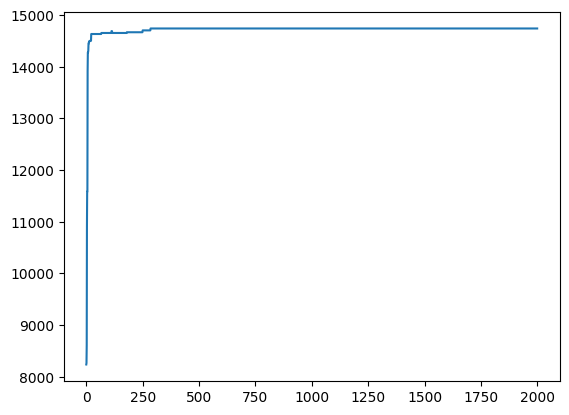

In [189]:
import random
import numpy as np

def calculate_fitness(individual, target_positions):
    fitness_value = 0
    for hero, target_lane in zip(individual, target_positions):
        if hero['Lane'] == target_lane:
            fitness_value += hero['Team_Fight']
    return fitness_value

def tournament_selection(population, fitness_values, tournament_size):
    selected_parents = []
    for _ in range(len(population)):
        tournament_candidates_indices = random.sample(range(len(population)), tournament_size)
        tournament_candidates_fitness = [fitness_values[i] for i in tournament_candidates_indices]
        winner_index = tournament_candidates_indices[np.argmax(tournament_candidates_fitness)]
        selected_parents.append(population[winner_index])
    return selected_parents

def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(individual, hero_data, mutation_rate):
    for i in range(len(individual)):
        if random.uniform(0, 1) < mutation_rate:
            new_hero = random.choice(hero_data)
            individual[i] = new_hero
    return individual

def genetic_algorithm(population, hero_data, target_positions, generations, tournament_size, crossover_rate, mutation_rate):
    temp_result = []
    for generation in range(generations):
        fitness_values = [calculate_fitness(individual, target_positions) for individual in population]
        
        # Seleksi orangtua menggunakan turnamen
        parents = tournament_selection(population, fitness_values, tournament_size)
        
        # Crossover
        children = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i + 1]
            if random.uniform(0, 1) < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
                children.append(child1)
                children.append(child2)
            else:
                children.append(parent1)
                children.append(parent2)
        
        # Mutasi
        mutated_children = [mutate(child, hero_data, mutation_rate) for child in children]
        
        # Gabungkan populasi lama dan baru, lalu pilih individu terbaik
        combined_population = population + mutated_children
        fitness_values_combined = [calculate_fitness(individual, target_positions) for individual in combined_population]
        best_indices_combined = np.argsort(fitness_values_combined)[-pop_size:]
        population = [combined_population[i] for i in best_indices_combined]
        
        # Cetak hasil setiap generasi
        temp_result.append(max(fitness_values))
        print(f"Generasi {generation + 1}, Fitness Terbaik: {max(fitness_values)}")

    # Pilih individu terbaik dari populasi terakhir
    fitness_values = [calculate_fitness(individual, target_positions) for individual in population]
    best_individual_index = np.argmax(fitness_values)
    best_individual = population[best_individual_index]



    return best_individual, temp_result

    
hero_data = hero_df.to_dict(orient='records')

# Inisialisasi populasi
pop_size = 30
population = []

for _ in range(pop_size):
    # Ambil 5 hero secara acak dari hero_data
    team = random.sample(hero_data[:-1], 5)  # Hanya ambil 5 hero, mengabaikan 'Badang'
    population.append(team)

# Inisialisasi populasi
initial_population = population

# Parameter algoritma genetika
target_positions = ['Gold Lane', 'Mid', 'EXP Lane', 'Roamer', 'Jungler']
target_fitness = 14742
generations = 2000
tournament_size = 3
crossover_rate = 0.8
mutation_rate = 0.1

# Jalankan algoritma genetika
result, temp_result = genetic_algorithm(initial_population, hero_data, target_positions, generations, tournament_size, crossover_rate, mutation_rate)

# Cetak hasil individu terbaik
print("Individu Terbaik:")
best_heroes = result
for hero in best_heroes:
    print(f"Name: {hero['Name']}, Lane: {hero['Lane']}")

plt.plot(temp_result)
plt.show()

In [175]:
import random
import numpy as np

def calculate_fitness(individual, target_positions):
    fitness_value = 0
    for hero, target_lane in zip(individual, target_positions):
        if hero['Lane'] == target_lane:
            fitness_value += hero['Hard_Engage']
    return fitness_value

def tournament_selection(population, fitness_values, tournament_size):
    selected_parents = []
    for _ in range(len(population)):
        tournament_candidates_indices = random.sample(range(len(population)), tournament_size)
        tournament_candidates_fitness = [fitness_values[i] for i in tournament_candidates_indices]
        winner_index = tournament_candidates_indices[np.argmax(tournament_candidates_fitness)]
        selected_parents.append(population[winner_index])
    return selected_parents

def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(individual, hero_data, mutation_rate):
    for i in range(len(individual)):
        if random.uniform(0, 1) < mutation_rate:
            new_hero = random.choice(hero_data)
            individual[i] = new_hero
    return individual

def genetic_algorithm(population, hero_data, target_positions, target_fitness, tournament_size, crossover_rate, mutation_rate):
    generation = 0
    while True:
        fitness_values = [calculate_fitness(individual, target_positions) for individual in population]

        if max(fitness_values) >= target_fitness:
            print(f"Target fitness achieved. Stopping algorithm.")
            break

        # Selection using tournament
        parents = tournament_selection(population, fitness_values, tournament_size)

        # Crossover
        children = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i + 1]
            if random.uniform(0, 1) < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
                children.append(child1)
                children.append(child2)
            else:
                children.append(parent1)
                children.append(parent2)

        # Mutation
        mutated_children = [mutate(child, hero_data, mutation_rate) for child in children]

        # Combine old and new population, then select the best individuals
        combined_population = population + mutated_children
        fitness_values_combined = [calculate_fitness(individual, target_positions) for individual in combined_population]
        best_indices_combined = np.argsort(fitness_values_combined)[-pop_size:]
        population = [combined_population[i] for i in best_indices_combined]

        # Print results for each generation
        print(f"Generation {generation + 1}, Best Fitness: {max(fitness_values)}")

        # Increment generation counter
        generation += 1

    # Select the best individual from the last population
    fitness_values = [calculate_fitness(individual, target_positions) for individual in population]
    best_individual_index = np.argmax(fitness_values)
    best_individual = population[best_individual_index]

    return best_individual, generation

    
hero_data = hero_df.to_dict(orient='records')

# Inisialisasi populasi
pop_size = 10
population = []

for _ in range(pop_size):
    # Ambil 5 hero secara acak dari hero_data
    team = random.sample(hero_data[:-1], 5)  # Hanya ambil 5 hero, mengabaikan 'Badang'
    population.append(team)

# Inisialisasi populasi
initial_population = population

# Parameter algoritma genetika
target_positions = ['Gold Lane', 'Mid', 'EXP Lane', 'Roamer', 'Jungler']
target_fitness = 1947
tournament_size = 3
crossover_rate = 0.8
mutation_rate = 0.1

# Run genetic algorithm
result, generations_needed = genetic_algorithm(initial_population, hero_data, target_positions, target_fitness, tournament_size, crossover_rate, mutation_rate)

# Print the best individual and number of generations needed
print(f"Best Individual After {generations_needed} Generations:")
for hero in result:
    print(f"Name: {hero['Name']}, Lane: {hero['Lane']}")

Generation 1, Best Fitness: 1090
Generation 2, Best Fitness: 1090
Generation 3, Best Fitness: 1128
Generation 4, Best Fitness: 1488
Generation 5, Best Fitness: 1488
Generation 6, Best Fitness: 1488
Generation 7, Best Fitness: 1494
Generation 8, Best Fitness: 1494
Generation 9, Best Fitness: 1494
Generation 10, Best Fitness: 1494
Generation 11, Best Fitness: 1494
Generation 12, Best Fitness: 1494
Generation 13, Best Fitness: 1494
Generation 14, Best Fitness: 1499
Generation 15, Best Fitness: 1499
Generation 16, Best Fitness: 1499
Generation 17, Best Fitness: 1499
Generation 18, Best Fitness: 1499
Generation 19, Best Fitness: 1499
Generation 20, Best Fitness: 1512
Generation 21, Best Fitness: 1512
Generation 22, Best Fitness: 1512
Generation 23, Best Fitness: 1521
Generation 24, Best Fitness: 1521
Generation 25, Best Fitness: 1521
Generation 26, Best Fitness: 1521
Generation 27, Best Fitness: 1521
Generation 28, Best Fitness: 1521
Generation 29, Best Fitness: 1521
Generation 30, Best Fit

Generasi 1, Fitness Terbaik: 1458
Generasi 2, Fitness Terbaik: 1458
Generasi 3, Fitness Terbaik: 1458
Generasi 4, Fitness Terbaik: 1842
Generasi 5, Fitness Terbaik: 1842
Generasi 6, Fitness Terbaik: 1880
Generasi 7, Fitness Terbaik: 1880
Generasi 8, Fitness Terbaik: 1880
Generasi 9, Fitness Terbaik: 1880
Generasi 10, Fitness Terbaik: 1880
Generasi 11, Fitness Terbaik: 1880
Generasi 12, Fitness Terbaik: 1880
Generasi 13, Fitness Terbaik: 1880
Generasi 14, Fitness Terbaik: 1880
Generasi 15, Fitness Terbaik: 1880
Generasi 16, Fitness Terbaik: 1880
Generasi 17, Fitness Terbaik: 1890
Generasi 18, Fitness Terbaik: 1890
Generasi 19, Fitness Terbaik: 1893
Generasi 20, Fitness Terbaik: 1901
Generasi 21, Fitness Terbaik: 1901
Generasi 22, Fitness Terbaik: 1901
Generasi 23, Fitness Terbaik: 1901
Generasi 24, Fitness Terbaik: 1901
Generasi 25, Fitness Terbaik: 1901
Generasi 26, Fitness Terbaik: 1901
Generasi 27, Fitness Terbaik: 1901
Generasi 28, Fitness Terbaik: 1901
Generasi 29, Fitness Terbaik:

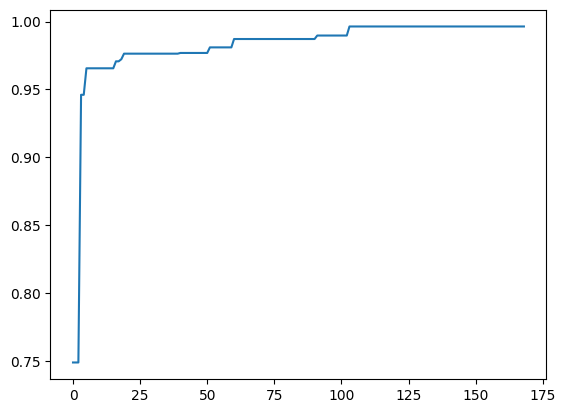

In [183]:
import random
import numpy as np

def calculate_fitness(individual, target_positions):
    fitness_value = 0
    for hero, target_lane in zip(individual, target_positions):
        if hero['Lane'] == target_lane:
            fitness_value += hero['Hard_Engage']
            # fitness_value += hero['Team_Fight']
    return fitness_value

def tournament_selection(population, fitness_values, tournament_size):
    selected_parents = []
    for _ in range(len(population)):
        tournament_candidates_indices = random.sample(range(len(population)), tournament_size)
        tournament_candidates_fitness = [fitness_values[i] for i in tournament_candidates_indices]
        winner_index = tournament_candidates_indices[np.argmax(tournament_candidates_fitness)]
        selected_parents.append(population[winner_index])
    return selected_parents

def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(individual, hero_data, mutation_rate):
    for i in range(len(individual)):
        if random.uniform(0, 1) < mutation_rate:
            new_hero = random.choice(hero_data)
            individual[i] = new_hero
    return individual

def genetic_algorithm(population, hero_data, target_positions, target_fitness, tournament_size, crossover_rate, mutation_rate):
    generation = 0
    temp_result = []
    while True:
        fitness_values = [calculate_fitness(individual, target_positions) for individual in population]

        # Check if the target fitness is achieved
        if max(fitness_values) >= target_fitness:
            print(f"Target fitness achieved. Stopping algorithm.")
            break

        # Seleksi orangtua menggunakan turnamen
        parents = tournament_selection(population, fitness_values, tournament_size)

        # Crossover
        children = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i + 1]
            if random.uniform(0, 1) < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
                children.append(child1)
                children.append(child2)
            else:
                children.append(parent1)
                children.append(parent2)

        # Mutasi
        mutated_children = [mutate(child, hero_data, mutation_rate) for child in children]

        # Gabungkan populasi lama dan baru, lalu pilih individu terbaik
        combined_population = population + mutated_children
        fitness_values_combined = [calculate_fitness(individual, target_positions) for individual in combined_population]
        best_indices_combined = np.argsort(fitness_values_combined)[-pop_size:]
        population = [combined_population[i] for i in best_indices_combined]

        # Save results
        data_dict = {
            "generation": generation,
            "data": population.copy(),
            'f_obj': max(fitness_values),
            'fitness': round(max(fitness_values) / target_fitness, 5),
        }

        temp_result.append(data_dict)

        # Cetak hasil setiap generasi
        print(f"Generasi {generation + 1}, Fitness Terbaik: {max(fitness_values)}")


        generation += 1

    # Pilih individu terbaik dari populasi terakhir
    fitness_values = [calculate_fitness(individual, target_positions) for individual in population]
    best_individual_index = np.argmax(fitness_values)
    best_individual = population[best_individual_index]

    return best_individual, temp_result

    
hero_data = hero_df.to_dict(orient='records')

# Inisialisasi populasi
pop_size = 10
population = []

for _ in range(pop_size):
    # Ambil 5 hero secara acak dari hero_data
    team = random.sample(hero_data[:-1], 5)  # Hanya ambil 5 hero, mengabaikan 'Badang'
    population.append(team)

# Inisialisasi populasi
initial_population = population

# Parameter algoritma genetika
target_positions = ['Gold Lane', 'Mid', 'EXP Lane', 'Roamer', 'Jungler']
target_fitness = 1947
tournament_size = 3
crossover_rate = 0.8
mutation_rate = 0.1

best_team, temp_result = genetic_algorithm(initial_population, hero_data, target_positions, target_fitness, tournament_size, crossover_rate, mutation_rate)

# Cetak hasil individu terbaik
print("Individu Terbaik:")
best_heroes = best_team
for hero in best_heroes:
    print(f"Name: {hero['Name']}, Lane: {hero['Lane']}")

df_result = pd.DataFrame(temp_result)
# print(df_result)
plt.plot(df_result['fitness'])
plt.show()
